In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import special

# Lecture 22

## Students Flipping Fair Coins Conclude Coin is Unfair!

Suppose there are 2000 CS Majors and each student:
* is given a fair coin by the instructor but _they are not told that it is a fair coin_
* **collects data** by flipping the coin **160 times** and counts the number of times it lands Heads
* runs a **hypothesis test**:
    * **Null Hypothesis:** They were given a fair coin and the number of heads observed see is due to chance.
    * **Alternative Hypothesis:** The coin is biased and so the number of heads they observed is not due to chance alone.
    * **Test Statistic:** abs(num_heads - 80)
* Uses the null probability distribution to report their *p-value* and rejects the null hypothesis **if their p-value is less than 0.05**

We know that **we gave all of them fair coins**.  How often will they **incorrectly reject the null hypothesis?**

### We can calculate the theoretical (exact) probability distribution, since this is a binomial distribution:

Text(0, 0.5, 'Percent per unit')

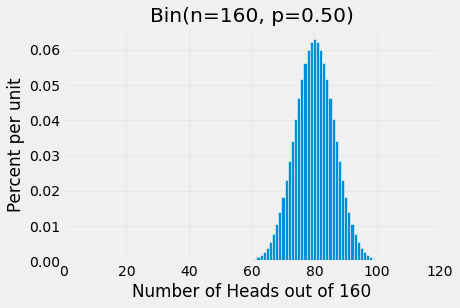

In [12]:
n=160
k = np.arange(n+1)
#Probability for a binomial distribution with p=0.50
p = special.comb(n, k)*(0.50**k)*(0.50**(n-k))

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(0,int(n*3/4))
plt.title("Bin(n="+str(n)+", p=0.50)");
plt.xlabel("Number of Heads out of "+str(n))
plt.ylabel("Percent per unit")


### For this example, we're going to use the test statistic |Num heads -80|.   For example, the probability that |Num heads - 80| = 1 is the sum of P(Num heads = 81) + Prob (num heads = 79).    Notice that using this we can plot the exact probability distribution for this test statistic as well. 

In [13]:
#Plot exact theoretical distribution of |Number of heads - n/2\:

#Create an empty array of size n/2
abs_theoretical_dist=np.zeros(int(n/2+1))

#The probability |Num heads - 50| = 0 is just P(Heads=50)
abs_theoretical_dist[0]=p[int(n/2)]

s = np.arange(start=1, stop=int(n/2+1), step=1)

#The probability |Num heads - 50| = k is Prob(Heads = 50+k) + Prob(Heads = 50-k)
for i in s:
    abs_theoretical_dist[i]=p[int(n/2-i)]+p[int(n/2+i)]


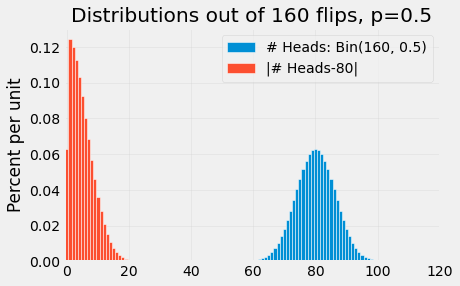

In [4]:
fig, ax = plt.subplots()

# Plot of number of heads
ax.bar(k, p, width=1, ec='white', label ="# Heads: Bin("+str(n)+", 0.5)");

# Plot of |heads - n/2|
ax.bar(np.arange(int(n/2+1)), abs_theoretical_dist, width=1, ec='white', label ='|# Heads-'+ str(int(n/2))+'|');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(-1,int(n*3/4))
plt.title("Distributions out of "+str(n)+ " flips, p=0.5");
#plt.xlabel("|Heads-50|")
plt.ylabel("Percent per unit")



plt.legend()

Could you write code to simulate the process of one student running this hypothesis test? 

In [14]:
def simulate_one_student(num_flips, plot=False):
    
    
    #Conduct experiment (flip coin num_flips times)
    obs_flips = np.random.choice(["H", "T"], num_flips) 

    # Define the test statistic
    def test_statistic(flips_dataset):
        num_heads = sum(flips_dataset == "H")
        return np.abs(num_heads - num_flips/2)
    
    # Compute the observed value of the statistic on our actual data
    obs_statistic = test_statistic(obs_flips)
    
    p_value = sum(abs_theoretical_dist[np.arange(int(num_flips/2+1))>=obs_statistic])
    p_value_round=round(p_value,2)
    
    if plot==True:
    
        fig, ax = plt.subplots()

        ax.bar(np.arange(int(n/2+1)), abs_theoretical_dist, width=1, ec='white');
        ax.set_axisbelow(True)
        ax.grid(alpha=0.25)
        plt.xlim(-1,int(num_flips/6))
        plt.title("Distribution of "+ str(num_flips)+ " tosses of fair coin")
        plt.xlabel("|# heads - "+ str(int(num_flips/2))+"|")
        plt.ylabel("Percent per unit")
        plt.scatter(obs_statistic, -0.002, color='red', s=70);
    
    #Color in the part of the histogram to the right of the observed statistic (i.e. the area that represents the p-value)
        
        ax.bar(np.arange(int(n/2+1))[np.arange(int(n/2+1))>=obs_statistic], abs_theoretical_dist[np.arange(int(n/2+1))>=obs_statistic], width=1, ec='white', label ='p-value ='+str(p_value_round),alpha=0.6);
        plt.legend()
    
   
    return p_value_round, int(obs_statistic)

(0.81, 2)

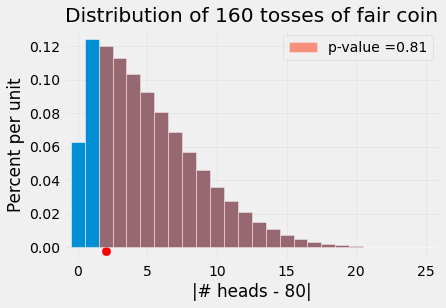

In [15]:
simulate_one_student(n, plot=True)

Text(0.5, 0, '|Heads-80|')

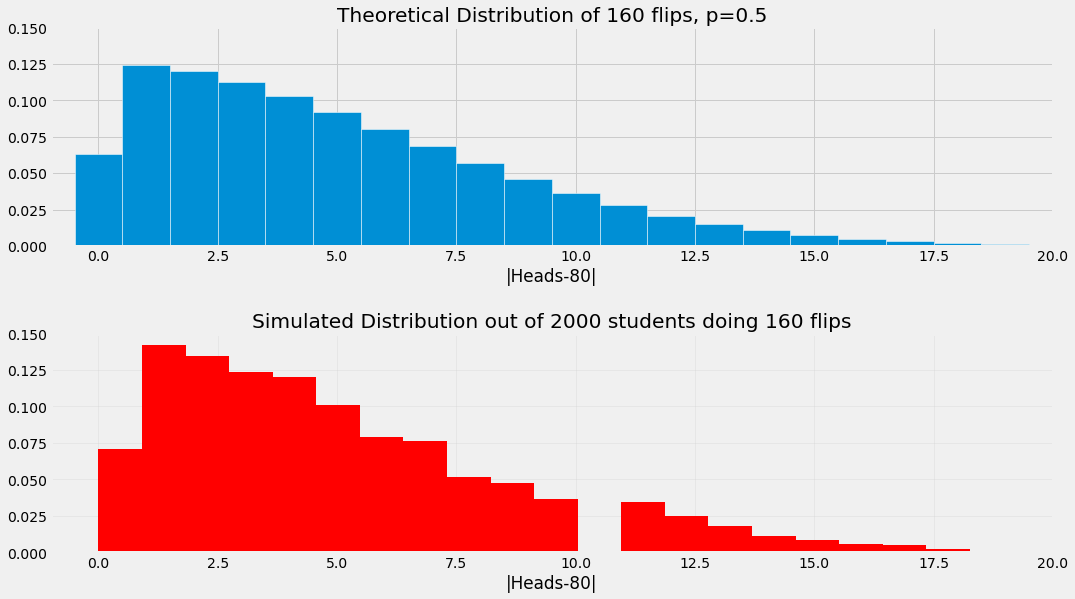

In [7]:
num_sim=2000

simulated_statistics = np.array([simulate_one_student(n) for i in range(num_sim)])

fig, ax = plt.subplots(2,1,figsize=(16,9))


plt.subplots_adjust(
                    wspace=0.4, 
                    hspace=0.4)

ax[0].bar(np.arange(int(n/2+1)), abs_theoretical_dist, width=1, ec='white', label ='|# Heads-'+ str(int(n/2))+'|');
ax[0].set_xlim(-1,20)
ax[0].set_ylim(0, .15)
ax[0].set_title("Theoretical Distribution of "+str(n)+ " flips, p=0.5")
ax[0].set_xlabel("|Heads-"+str(int(n/2))+"|")


ax[1].hist(simulated_statistics[:,1],density=True,bins=23, color='r');
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25)
ax[1].set_xlim(-1,20)
ax[1].set_ylim(0, .15)
ax[1].set_title("Simulated Distribution out of "+str(num_sim)+" students doing "+str(n)+ " flips")
ax[1].set_xlabel("|Heads-"+str(int(n/2))+"|")

## Law of Large Numbers

The empirical distribution looks more and more similar to the theoretical distribution emprical distribution under the null.  More is better!

# What is the smallest observed test statistic that results in a p-value <0.05?

In [16]:
# Guess and check below:
print(sum(abs_theoretical_dist[12:]))
print(sum(abs_theoretical_dist[13:]))

#need observed test statistic greater than or equal to ____ for p-value<0.05


0.0686822920412063
0.04776699602827606


In [17]:
def plot_crit_value(n, crit_value):
    p_value_crit=sum(abs_theoretical_dist[crit_value:])
    
    fig, ax = plt.subplots()

    # Plot of |heads - n/2|
    ax.bar(np.arange(int(n/2+1)), abs_theoretical_dist, width=1, ec='white', label ='|# Heads-'+ str(int(n/2))+'|');
    ax.set_axisbelow(True)
    ax.grid(alpha=0.25)
    plt.xlim(-1,int(n*1/6))
    #plt.title("Distribution out of "+str(n)+ " flips, p=0.5, Obs Test Stat = "+str(crit_value));
    plt.title("Distribution out of "+str(n)+ " flips, p=0.5");
    plt.xlabel("|Heads-"+str(int(n/2))+"|")
    plt.ylabel("Percent per unit")
    plt.scatter(crit_value, -0.002, color='red', s=70);    
    #Color in the part of the histogram to the right of the observed statistic (i.e. the area that represents the p-value)    
    ax.bar(np.arange(int(n/2+1))[np.arange(int(n/2+1))>=crit_value], abs_theoretical_dist[np.arange(int(n/2+1))>=crit_value], width=1, ec='white', label ='p-value ='+str(p_value_crit),alpha=0.6);
    plt.legend()

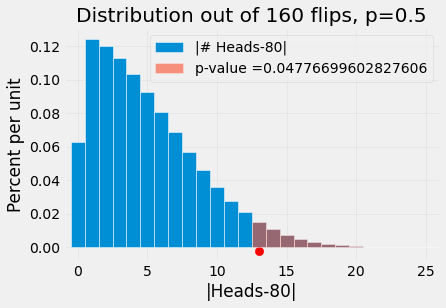

In [18]:
plot_crit_value(n, 13)

Number of students out of 2000  with p-value less than 0.05 =   96


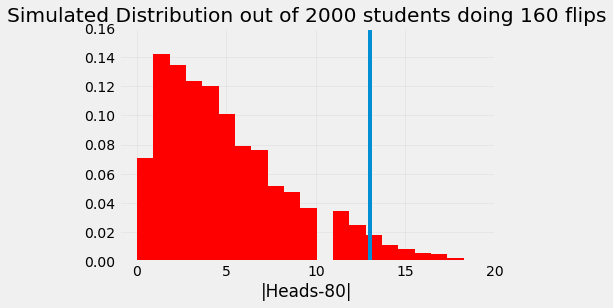

In [11]:
fig, ax = plt.subplots()

ax.hist(simulated_statistics[:,1],density=True,bins=23, color='r');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
ax.set_xlim(-1,20)
ax.set_ylim(0, .16)
ax.set_title("Simulated Distribution out of "+str(num_sim)+" students doing "+str(n)+ " flips")
ax.set_xlabel("|Heads-"+str(int(n/2))+"|")
ax.axvline(x=13)


#Empirical output:  How many out of the 2000 students had a significant p-value?
print("Number of students out of", str(num_sim)," with p-value less than 0.05 =  ", str(sum(simulated_statistics[:,1]>=13)))

## Notice: In our simulation above, we chose a significance level (i.e. p-value cutoff of 5%).  In this case approximately  5% of the 2000 students would incorrectly reject the null hypothesis and say their coin was biased, even when it wasn't

<br><br><br><br>

---

## Super Soda Co and the Case of Bad Taste

Manufacturers of Super Soda run a taste test and 91 out of 200 tasters prefer Super Soda over its rival.  The boss is upset!  He asks:

    Do fewer people prefer Super Soda, or is this just chance?
    
You run a hypothesis test:

* **Null Hypothesis:** Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
* **Alternative Hypothesis:** Fewer people in the population prefer Super Soda than its Rival.
* **Test Statistic:** Number of people who prefer Super Soda


You pick a **significance level (i.e. p-value cutoff) of 0.05**

### Null Hypothesis Distribution:
What probability distribution models our null hypothesis?  Plot a histogram of this distribution AND a red dot with the observed test statistic.


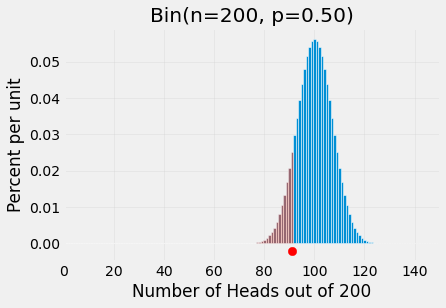

In [19]:
n=200
k = np.arange(n+1)
#Probability for a binomial distribution with p=0.50
p = special.comb(n, k)*(0.50**k)*(0.50**(n-k))

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(0,int(n*3/4))
plt.title("Bin(n="+str(n)+", p=0.50)");
plt.xlabel("Number of Heads out of "+str(n))
plt.ylabel("Percent per unit")


obs_stat=91

#Add a dot for the observed statistic
plt.scatter(obs_stat, -0.002, color='red', s=70);
#Shade in the p-value   
ax.bar(np.arange(n+1)[np.arange(n+1)<=obs_stat], p[np.arange(n+1)<=obs_stat], width=1, ec='white',alpha=0.6);



### Theoretical P-Value

In [20]:
#Since we have the theoretical probability distribution,
#the p-value is just the sum of the probabilities for X<=91
actual_p_val = sum(p[np.arange(n+1)<=obs_stat])

actual_p_val


0.11462329862986695

## Conclusion of Test:

Since 0.11>0.05, we **fail to reject** the null hypothesis that equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.


---

## Empirical P-Value:  The Importance of Number of Simulations.

What if we didn't know the theoretical distribution?  How does the theoretical p-value compare to simulated p-values?  Suppose we're simulating the null hypothesis (instead of using the actual theoretical distribution).  Let's examine how the number of simulations we use affects how accurate our empirical p-value estimate is.


In [21]:
#Simulate the number of heads when randomly flipping a fair coin 200 times

def simulate_one_count(sample_size):
    return np.count_nonzero(np.random.choice(['H', 'T'], sample_size) == 'H')
simulate_one_count(200)

100

## Changing the number of simulations

In [27]:
# Keeping the observed test statistic fixed, 
# we can re-run the test with a new simulation under the null

def run_test(num_simulations, sample_size):
    counts=np.array([simulate_one_count(sample_size) for i in range(num_simulations)])
    return counts

counts = run_test(10000, 200)
print("Actual (theoretical) p-value: ", actual_p_val)
print("Empirical (simulated) p-value using 10000 simulations: ", np.count_nonzero(counts <= 91)/len(counts))
print(sum(counts<=91)/10000)
print(np.mean(counts<=91))
print((counts<=91).mean())
print(np.count(counts<=91)/10000)

Actual (theoretical) p-value:  0.11462329862986695
Empirical (simulated) p-value using 10000 simulations:  0.117
0.117
0.117
0.117


AttributeError: module 'numpy' has no attribute 'count'

In [17]:
# Let's see how the empirical p-value varies with the
# number of siulations:  
tests = pd.DataFrame(columns=['simulations', 'p-value for 91'])
    
for num_sims in [100, 1000, 10000]:
    for k in np.arange(50):
        counts = run_test(num_sims, 200)
        tests.loc[len(tests.index)] = [num_sims, 
            np.count_nonzero(counts <= 91)/len(counts)] 
 


tests

,simulations,p-value for 91
0,100.0,0.1400
1,100.0,0.0800
2,100.0,0.1300
3,100.0,0.1400
4,100.0,0.1000
...,...,...
145,10000.0,0.1172
146,10000.0,0.1109
147,10000.0,0.1133
148,10000.0,0.1117


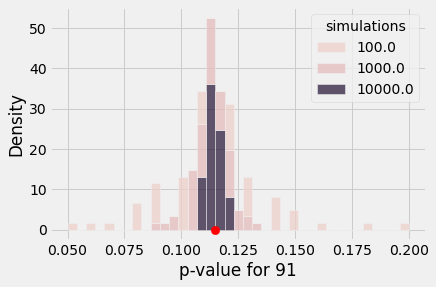

In [18]:
# For larger numbers of simulations, p-values are more consistent
# Since a large number of simulations provides a good estimate of the
# theoretical distribution of the test statistic under the null hypothesis:

sns.histplot(data=tests, x="p-value for 91", hue="simulations", multiple="stack",stat="density")
plt.scatter(actual_p_val, -0.002, color='red', s=70);

## Analyzing Power of Test:


### Definition:  The Power of a hypothesis test is the probability of correctly rejecting the null hypothesis when the alternative hypothesis is true.

**Convention: We usually try to design hypothesis tests so that the power is at least 80%.**  
Power is affected by 
 - Significance level (p-value cutoff)
 - Sample size
 - Effect size
 
Let's experiment with how these 3 factors can affect the power of the test: 

Suppose in reality the true proportion of people who prefer Super Soda is 45% (i.e. your null hypothesis is actually wrong).

You don't know this, so your null hypothesis remains the same.  Let's look at how often we correctly reject the null in this case.

* **Null Hypothesis:** Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
* **Alternative Hypothesis:** Fewer people in the population prefer Super Soda than its Rival.
* **Test Statistic:** Number of people who prefer Super Soda


In [19]:
# Suppose that the true proportion of people who prefer Super Soda is 45%
true_proportion = 0.45
true_distribution = [true_proportion, 1 - true_proportion]
true_distribution

[0.45, 0.55]

In [142]:
# Taste tests with 200 people will give various numbers of people who prefer Super Soda
sample_size = 200

np.random.binomial(sample_size, true_distribution).item(0)


103

In [145]:
 
# Suppose in the actual population, 45% of people like Super Soda
# Let's run a taste test for 200 people, 
# and calculate the p-value:

def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = [true_proportion, 1 - true_proportion]
    taste_test_results = np.random.binomial(sample_size, true_distribution)
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    counts = run_test(num_simulations, sample_size)
    p_value = np.count_nonzero(counts <= observed_stat_from_this_sample) / len(counts)
    return p_value

("P-value from one experiment:", run_experiment(10000, 200, 0.45))

('P-value from one experiment:', 0.1478)

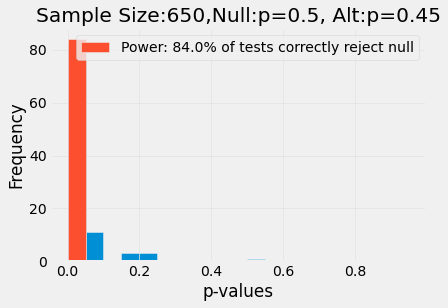

In [149]:
# Let's imagine running our taste test over and over again to see how often 
# we correctly reject the null:

true_proportion = 0.45
sample_size = 650

p_values=np.array([run_experiment(1000,sample_size,true_proportion) for i in range(100)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



### Determining Sample Size for Power of 80%:
#### If the true proportion of people who like Super Soda is 0.45, what Sample Size do we need to use to correctly reject our null hypothesis (that the proportion is 0.5) at least 80% of the time?  (i.e. what sample size do we need to get a Power of at least 80%)?

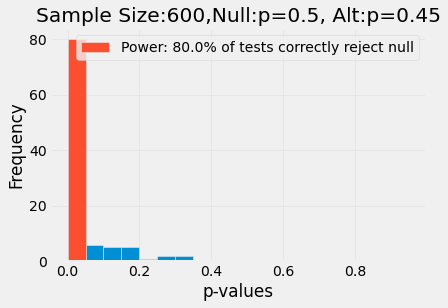

In [126]:
true_proportion = 0.45
sample_size = 600

p_values=np.array([run_experiment(1000,sample_size,true_proportion) for i in range(100)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



### Effect Size:
**Effect Size**:  The difference between the true proportion and the null hypothesis proportion.
#### Experiment with different effect sizes.  How does the power of the test change as you change the effect size ?

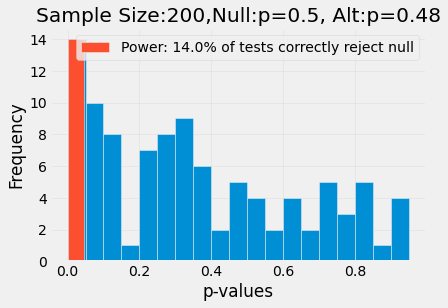

In [151]:
true_proportion = .48
sample_size = 200

p_values=np.array([run_experiment(1000,sample_size,true_proportion) for i in range(100)])

fig, ax = plt.subplots()
 
ax.hist(p_values,bins=np.arange(0,1, .05));
ax.hist(p_values[p_values<=0.05],bins=1,label="Power: "+str(100*np.mean(p_values <= 0.05))+"% of tests correctly reject null")
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.title("Sample Size:"+str(sample_size)+",Null:p=0.5, Alt:p="+str(true_proportion));
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.legend()



Making the effect size larger and keeping the same sample size the same (200) leads to a larger power of the test (we're more likely to be able to correctly reject the null). 
Similarly, if we decrease the effect size, we will need a larger sample size to keep the same level of power. 